In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings(action='ignore')
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.formula.api as formula
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels as sm
from sklearn import preprocessing
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import LinearRegression,Lasso,Ridge
#from sklearn.externals import joblib
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from IPython.display import display
from sklearn import metrics

In [2]:
data = pd.read_excel (r'C:\Users\Kira\Desktop\Internship\Data\Delhi_Data-20210529T043217Z-001\Delhi_Data\2013-2020-RK-PURAM-final-dataset\3y_weekly_RKPURAM.xlsx')
data['From Date']=pd.to_datetime(data['From Date'])
data['year'] = data['From Date'].dt.year
data['month'] = data['From Date'].dt.month
data['day'] = data['From Date'].dt.day

In [3]:
import datetime as dt

In [4]:
data['From Date']= data['From Date'].map(dt.datetime.toordinal)

In [5]:
df=data.loc['0':'207']

In [6]:
df.columns

Index(['From Date', 'PM2.5y1', 'PM1y1', 'NOy1', 'NO2y1', 'NOxy1', 'NH3y1',
       'SO2y1', 'COy1', 'Ozoney1', 'RHy1', 'WSy1', 'WDy1', 'SRy1', 'BPy1',
       'ATy1', 'PM2.5y2', 'PM1y2', 'NOy2', 'NO2y2', 'NOxy2', 'NH3y2', 'SO2y2',
       'COy2', 'Ozoney2', 'RHy2', 'WSy2', 'WDy2', 'SRy2', 'BPy2', 'ATy2',
       'PM2.5y3', 'PM1y3', 'NOy3', 'NO2y3', 'NOxy3', 'NH3y3', 'SO2y3', 'COy3',
       'Ozoney3', 'RHy3', 'WSy3', 'WDy3', 'SRy3', 'BPy3', 'ATy3', 'PM2.5',
       'PM1', 'NO', 'NO2', 'NOx', 'NH3', 'SO2', 'CO', 'Ozone', 'RH', 'WS',
       'WD', 'SR', 'BP', 'AT', 'year', 'month', 'day'],
      dtype='object')

In [7]:
X1 = df[['PM2.5y1', 'PM1y1', 'NOy1', 'NO2y1', 'NOxy1', 'NH3y1',
       'COy1','ATy1', 'PM2.5y2', 'PM1y2', 'NOy2', 'NO2y2', 'NOxy2', 'NH3y2',
       'COy2','ATy2','PM2.5y3', 'PM1y3', 'NOy3', 'NO2y3', 'NOxy3', 'NH3y3', 'COy3',
        'ATy3','year', 'month', 'day']]
Y1 = df['PM1']

In [8]:
xtrain=X1.loc['0':'155']
ytrain=Y1.loc['0':'155',]
xtest=X1.loc['155':'207']
ytest=Y1.loc['155':'207']

In [55]:
#xtrain,xtest,ytrain,ytest = train_test_split(X1,Y1,test_size=.2,random_state=4)

In [21]:
grad_boost = GradientBoostingRegressor(n_estimators=2000,
                                      max_depth=6,
                                      max_features=0.1,
                                      min_samples_split=3,
                                      min_samples_leaf=6,
                                      learning_rate=0.001)

grad_boost.fit(xtrain,ytrain)

GradientBoostingRegressor(learning_rate=0.001, max_depth=6, max_features=0.1,
                          min_samples_leaf=6, min_samples_split=3,
                          n_estimators=2000)

In [22]:
# we now score the model
print('Score on train data: {}\n'.format(grad_boost.score(xtrain,ytrain)))
print('Score on test data: {}\n'.format(grad_boost.score(xtest,ytest)))

gboost_pred = grad_boost.predict(xtest)
gboost_mse = mean_squared_error(ytest,gboost_pred)
gboost_accuracy = r2_score(ytest,gboost_pred)

print('Root Mean Squared Error: {}\n'.format(np.sqrt(gboost_mse)))
print('Overall model accuracy: {}'.format(gboost_accuracy))

Score on train data: 0.8785867345174678

Score on test data: 0.5187666711614592

Root Mean Squared Error: 72.99705188329504

Overall model accuracy: 0.5187666711614592


In [23]:
test=data.loc['207':'259']
X=test[['PM2.5y1', 'PM1y1', 'NOy1', 'NO2y1', 'NOxy1', 'NH3y1',
       'COy1','ATy1', 'PM2.5y2', 'PM1y2', 'NOy2', 'NO2y2', 'NOxy2', 'NH3y2',
       'COy2','ATy2','PM2.5y3', 'PM1y3', 'NOy3', 'NO2y3', 'NOxy3', 'NH3y3', 'COy3',
        'ATy3','year', 'month', 'day']]
X

,PM2.5y1,PM1y1,NOy1,NO2y1,NOxy1,NH3y1,COy1,ATy1,PM2.5y2,PM1y2,...,PM1y3,NOy3,NO2y3,NOxy3,NH3y3,COy3,ATy3,year,month,day
207,302.818571,428.861429,125.535714,76.847143,144.901429,32.607143,2.175714,8.394286,217.428571,371.975714,...,416.398571,100.627143,83.730000,212.015714,56.007143,2.998571,12.122857,2019,12,29
208,316.292857,456.537143,109.870000,52.067143,117.267143,29.011429,1.537714,8.800000,264.292857,452.655714,...,332.717143,98.832857,67.225714,194.864286,57.234286,3.004286,10.478571,2020,1,5
209,241.932857,349.680000,84.832857,58.215714,100.144286,31.015714,0.970000,11.971429,191.864286,344.172857,...,282.434286,101.944286,57.842857,190.755714,48.108571,2.867143,12.764286,2020,1,12
210,253.915714,405.144286,117.140000,58.545714,126.631429,28.408571,1.768000,9.905714,237.660000,405.398571,...,346.604286,94.412857,75.028571,195.770000,43.388571,2.740000,8.177143,2020,1,19
211,128.998571,223.215604,34.865714,44.648571,52.171429,23.565714,2.566000,10.632857,173.172857,302.185714,...,237.858571,49.015714,68.434286,127.910000,44.487143,1.844286,9.742857,2020,1,26
212,187.365714,225.330769,47.905714,49.550000,65.417143,23.558571,2.305429,9.834286,143.550000,284.925714,...,251.350000,74.012857,62.091429,156.391429,42.347143,2.127143,13.330000,2020,2,2
213,146.527143,198.920769,65.595714,50.381429,80.275714,22.507143,1.334286,11.920000,193.068571,331.052857,...,328.171429,153.021429,66.960000,268.622857,39.584286,2.754286,13.437143,2020,2,9
214,193.267143,333.581429,73.142857,72.708571,98.288571,27.225714,1.971429,13.324286,109.957143,204.577143,...,279.338571,50.672857,67.874286,129.678571,30.340000,1.890000,13.547143,2020,2,16
215,110.288571,192.155714,68.825714,73.708571,96.087143,27.742857,1.424286,15.858571,166.732857,330.682857,...,275.608571,34.234286,82.401429,120.168571,37.265714,1.715714,16.775714,2020,2,23
216,108.875000,172.547857,86.743571,88.330000,117.698571,27.334286,1.810714,12.517143,109.975714,228.510000,...,280.377143,38.925714,62.438571,108.778571,26.370000,1.704286,17.097143,2020,3,1


In [24]:
predict=grad_boost.predict(X)

In [25]:
predict

array([342.41230793, 316.54148762, 282.48079998, 309.30390833,
       282.53300134, 266.32421066, 276.23690142, 258.62300675,
       281.64640141, 257.16902695, 239.18394571, 239.14262914,
       221.5905446 , 242.38717291, 227.25627647, 207.6372646 ,
       243.27027895, 266.84481141, 208.1343633 , 262.40680946,
       217.56353331, 250.18232674, 238.72944691, 193.44926184,
       213.81030401, 222.24545505, 189.44534006, 166.59598143,
       164.36884747, 138.47943448, 131.49734146, 156.69351982,
       140.42466507, 139.1310211 , 130.42126306, 129.91972   ,
       140.56377774, 138.12776742, 137.65985132, 174.06632578,
       221.71505355, 257.33829508, 286.00364006, 286.83430921,
       296.80454528, 299.51318096, 339.38286174, 312.14745618,
       307.46793959, 344.83425545, 317.29328761, 322.38787037,
       318.27035423])

In [26]:
dates=data.loc['207':'259','From Date']

In [27]:
X['From Date']=dates.values

In [28]:
X.columns

Index(['PM2.5y1', 'PM1y1', 'NOy1', 'NO2y1', 'NOxy1', 'NH3y1', 'COy1', 'ATy1',
       'PM2.5y2', 'PM1y2', 'NOy2', 'NO2y2', 'NOxy2', 'NH3y2', 'COy2', 'ATy2',
       'PM2.5y3', 'PM1y3', 'NOy3', 'NO2y3', 'NOxy3', 'NH3y3', 'COy3', 'ATy3',
       'year', 'month', 'day', 'From Date'],
      dtype='object')

In [29]:
X['From Date']= X['From Date'].map(dt.datetime.fromordinal)

In [30]:
test['From Date']= test['From Date'].map(dt.datetime.fromordinal)

In [31]:
test = test.set_index(['From Date'])
X = X.set_index(['From Date'])


In [32]:
X['pred']=predict

<AxesSubplot:xlabel='From Date'>

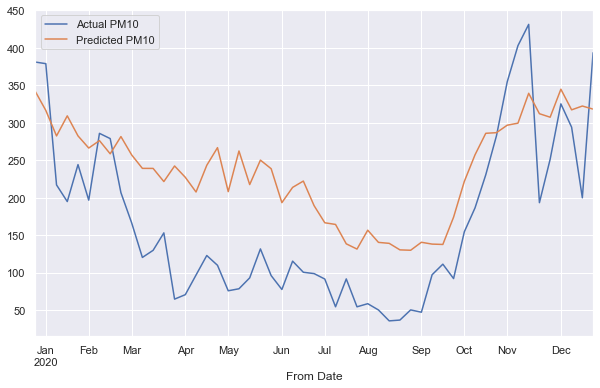

In [33]:
test['PM1'].plot(legend=True, label='Actual PM10', figsize=(10,6))
X['pred'].plot(legend=True, label='Predicted PM10')

In [34]:
np.sqrt(mean_squared_error(test['PM1'],X['pred']))

96.17126242545282

In [35]:
mae = metrics.mean_absolute_error(ytest, gboost_pred)
mse = metrics.mean_squared_error(ytest, gboost_pred)
rmsetest = np.sqrt(mse) # or mse**(0.5)  
r2 = metrics.r2_score(ytest,gboost_pred)

print("Results of sklearn.metrics:")
print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmsetest)
print("R-Squared:", r2)

Results of sklearn.metrics:
MAE: 61.9195994249833
MSE: 5328.569583652468
RMSE: 72.99705188329504
R-Squared: 0.5187666711614592


In [36]:
mae = metrics.mean_absolute_error(test['PM1'],X['pred'])
mse = metrics.mean_squared_error(test['PM1'],X['pred'])
rmse = np.sqrt(mse) # or mse**(0.5)  
r2 = metrics.r2_score(test['PM1'],X['pred'])

print("Results of sklearn.metrics:")
print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-Squared:", r2)

Results of sklearn.metrics:
MAE: 87.06277259658408
MSE: 9248.911716505314
RMSE: 96.17126242545282
R-Squared: 0.22002656497352002


In [37]:
import pickle
filename = 'PM10_gboost3y.sav'
pickle.dump(grad_boost, open(filename, 'wb'))

In [38]:
#load model
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(xtest, ytest)
print(result)

0.5187666711614592


# 3rd plot

In [39]:
testcase = pd.DataFrame()

In [40]:
testcase['test']=ytest
testcase['pred']=gboost_pred

In [41]:
testcase["Corrected"] = np.where(testcase["pred"]<testcase["test"],testcase["pred"]+rmsetest ,
                   np.where(testcase["pred"]>testcase["test"], testcase["pred"]-rmsetest,
                            testcase["pred"]))

In [42]:
testcase

,test,pred,Corrected
155,428.861429,382.851883,455.848935
156,456.537143,331.121865,404.118917
157,349.680000,311.486781,384.483833
158,405.144286,328.026598,401.023649
159,223.215604,306.979886,233.982834
160,225.330769,295.215154,222.218102
161,198.920769,308.341235,235.344183
162,333.581429,257.168790,330.165841
163,192.155714,283.051350,210.054299
164,172.547857,255.020794,182.023742


In [43]:
'''testcase['test'].plot(legend=True, label='Actual PM2.5', figsize=(10,6))
testcase['pred'].plot(legend=True, label='Predicted PM2.5')
testcase["Corrected"].plot(legend=True, label='Corrected PM2.5')'''

'testcase[\'test\'].plot(legend=True, label=\'Actual PM2.5\', figsize=(10,6))\ntestcase[\'pred\'].plot(legend=True, label=\'Predicted PM2.5\')\ntestcase["Corrected"].plot(legend=True, label=\'Corrected PM2.5\')'

In [44]:
r2 = metrics.r2_score(testcase["Corrected"],testcase['test'])
r2

0.8669258863288094

In [45]:
test2020=pd.DataFrame()

In [46]:
test2020['test']=test['PM1']
test2020['pred']=X['pred']

In [47]:
test2020.index=test.index

In [48]:
test2020["Corrected"] = np.where(test2020["pred"]<test2020["test"],test2020["pred"]+rmsetest ,
                   np.where(test2020["pred"]>test2020["test"], test2020["pred"]-rmsetest,
                            test2020["pred"]))

<AxesSubplot:xlabel='From Date'>

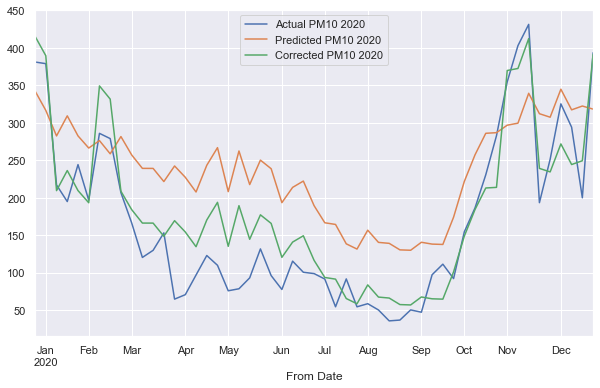

In [49]:
test2020['test'].plot(legend=True, label='Actual PM10 2020', figsize=(10,6))
test2020['pred'].plot(legend=True, label='Predicted PM10 2020')
test2020["Corrected"].plot(legend=True, label='Corrected PM10 2020')

In [50]:
r2020 = metrics.r2_score(test2020["Corrected"],test2020['test'])
r2020

0.8117535753151682